# Continuous Peaks (CP)

A problem in continuation of the 4 Peaks. It exploits the flaws of RHC by making continuous local maximum values with a large plateaus, allowing some algorithms to easily get stuck and failing to converge to a better solution.

In [1]:
import numpy as np
import random
import sys
import timeit
import six
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive
from mlrose_hiive.runners import GARunner, MIMICRunner, RHCRunner, SARunner
from mlrose_hiive.generators import FlipFlopGenerator
from mlrose_hiive.generators import ContinuousPeaksGenerator
from mlrose_hiive.generators import TSPGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gtid = 903657078
np.random.seed(gtid)

In [3]:
num_peak = 50
iterations_range = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
OUTPUT_DIRECTORY = 'D:/OMSCS/ml/Assignment2/figures'

# Generate the fitness problem and the optimization function
problem = ContinuousPeaksGenerator.generate(seed=gtid, size=num_peak)

In [4]:
def plot_fitness_curve(title, x, y ,z):
    fig1, ax1 = plt.subplots()
    ax1.title.set_text(title)
    ax2 = ax1.twinx()
    ax1.plot(x, y, 'r-')
    ax2.plot(x, z, 'b-')
    ax1.set_xlabel('Number of Iterations')
    ax1.set_ylabel('Fitness', color='g')
    ax2.set_ylabel('Time (s)', color='b')
    ax1.set_yticks(np.arange(10, 120, 10))
    plt.grid()
    plt.show

In [5]:
#========== Random Hill Climb Parameter Optimization==========#
def opt_rhc_params():
    rhc = RHCRunner(problem=problem,
                    experiment_name='Optimal Params for 30 peaks RHC',
                    output_directory=OUTPUT_DIRECTORY,
                    seed=gtid,
                    iteration_list=2 ** np.arange(1,12),
                    max_attempts=500,
                    restart_list=[5, 10, 15, 20, 25, 30])
    rhc_df_run_stats, rhc_df_run_curves = rhc.run()
    ideal_rs = rhc_df_run_stats[['current_restart']].iloc[rhc_df_run_stats[['Fitness']].idxmax()] 
    return rhc_df_run_stats, rhc_df_run_curves, ideal_rs

In [6]:
rhc_df_run_stats, rhc_df_run_curves, ideal_rs = opt_rhc_params()
ideal_rs = int(ideal_rs.iat[0,0])
print('the number of random restarts is: ', ideal_rs)

the number of random restarts is:  0


In [7]:
rhc_best_state = []
rhc_best_fitness = []
rhc_convergence_time = []
for iter in iterations_range:
    start_time = timeit.default_timer()
    best_state, best_fitness, curve = mlrose_hiive.random_hill_climb(problem=problem, 
                                                                    max_iters=iter, 
                                                                    max_attempts=500, 
                                                                    restarts=ideal_rs, 
                                                                    curve=True)
    end_time = timeit.default_timer()
    convergence_time = (end_time - start_time)
    rhc_best_state.append(best_state)
    rhc_best_fitness.append(best_fitness)
    rhc_convergence_time.append(convergence_time)
print('The fitness at the best state found using Random Hill Climbing is: ', max(rhc_best_fitness))

The fitness at the best state found using Random Hill Climbing is:  73.0


In [8]:
#========== Genetic Algorithms Parameter Optimization==========#
def opt_ga_params():
    ga = GARunner(problem=problem,
                  experiment_name='Optimal Params for 30 peaks GA',
                  output_directory=OUTPUT_DIRECTORY,
                  seed=gtid,
                  iteration_list=2 ** np.arange(1,12),
                  max_attempts=500,
                  population_sizes=[10, 50, 100, 200, 300],
                  mutation_rates=[0.2, 0.4, 0.6, 0.8, 1])
    ga_df_run_stats, ga_df_run_curves = ga.run()
    ideal_pop_size = ga_df_run_stats[['Population Size']].iloc[ga_df_run_stats[['Fitness']].idxmax()]
    ideal_mutation_rate = ga_df_run_stats[['Mutation Rate']].iloc[ga_df_run_stats[['Fitness']].idxmax()]
    return ga_df_run_stats, ga_df_run_curves, ideal_pop_size, ideal_mutation_rate

In [9]:
ga_df_run_stats, ga_df_run_curves, ideal_pop_size, ideal_mutation_rate = opt_ga_params()
ideal_pop_size = int(ideal_pop_size.iat[0,0])
ideal_mutation_rate = float(ideal_mutation_rate.iat[0,0])
print('the size of population to be used is: ', ideal_pop_size)
print('the probability of a mutation during reproduction: ', ideal_mutation_rate)

the size of population to be used is:  10
the probability of a mutation during reproduction:  0.8


In [10]:
ga_best_state = []
ga_best_fitness = []
ga_convergence_time = []

for iter in iterations_range:
    start_time = timeit.default_timer()
    best_state, best_fitness, curve = mlrose_hiive.genetic_alg(problem=problem,
                                                               pop_size=ideal_pop_size,
                                                               mutation_prob = ideal_mutation_rate,
                                                               max_attempts = 500, 
                                                               max_iters = iter, 
                                                               curve=True)
    end_time = timeit.default_timer()
    convergence_time = (end_time - start_time)
    ga_best_state.append(best_state)
    ga_best_fitness.append(best_fitness)
    ga_convergence_time.append(convergence_time)
print('The fitness at the best state found using Genetic Algorithms is: ', max(ga_best_fitness))

The fitness at the best state found using Genetic Algorithms is:  94.0


In [11]:
#========== Simulated Annealing Parameter Optimization==========#
def opt_sa_params():
    sa = SARunner(problem=problem,
                  experiment_name='Optimal Params for 30 peaks GA',
                  output_directory=OUTPUT_DIRECTORY,
                  seed=gtid,
                  iteration_list=2 ** np.arange(12),
                  max_attempts=500,
                  temperature_list=[1, 5, 10, 20, 50, 100])
    sa_df_run_stats, sa_df_run_curves = sa.run()
    ideal_temp = sa_df_run_stats[['Temperature']].iloc[sa_df_run_stats[['Fitness']].idxmax()]
    return sa_df_run_stats, sa_df_run_curves, ideal_temp

In [12]:
sa_df_run_stats, sa_df_run_curves, ideal_temp = opt_sa_params()
ideal_temp = sa_df_run_stats['Temperature'].iloc[sa_df_run_stats['Fitness'].idxmin()]
print('the value of the temperature parameter is: ', ideal_temp)

the value of the temperature parameter is:  5


In [13]:
sa_best_state = []
sa_best_fitness = []
sa_convergence_time = []

for iter in iterations_range:
    start_time = timeit.default_timer()
    best_state, best_fitness, curve = mlrose_hiive.simulated_annealing(problem=problem,
                                                                       schedule=ideal_temp,
                                                                       max_attempts = 500,
                                                                       max_iters = iter, 
                                                                       curve=True)
    end_time = timeit.default_timer()
    convergence_time = (end_time - start_time)
    sa_best_state.append(best_state)
    sa_best_fitness.append(best_fitness)
    sa_convergence_time.append(convergence_time)
print('The fitness at the best state found using Simulated Annealing is: ',max(sa_best_fitness))

The fitness at the best state found using Simulated Annealing is:  94.0


In [14]:
#========== Mutual-Information-Maximizing Input Clustering (MIMIC) Parameter Optimization ==========#
def opt_mimic_params():
    mmc = MIMICRunner(problem=problem,
                      experiment_name='Optimal Params for 30 peaks MIMIC',
                      output_directory=OUTPUT_DIRECTORY,
                      seed=gtid,
                      iteration_list=2 ** np.arange(12),
                      max_attempts=50,
                      population_sizes=[10, 30, 60, 120, 250],
                      keep_percent_list=[0.1, 0.25, 0.5, 0.75])
    mmc_df_run_stats, mmc_df_run_curves = mmc.run()
    ideal_pop_size = mmc_df_run_stats[['Population Size']].iloc[mmc_df_run_stats[['Fitness']].idxmax()]
    ideal_keep_prcnt = mmc_df_run_stats[['Keep Percent']].iloc[mmc_df_run_stats[['Fitness']].idxmax()]
    return mmc_df_run_stats, mmc_df_run_curves, ideal_keep_prcnt, ideal_pop_size

In [15]:
mmc_df_run_stats, mmc_df_run_curves, ideal_keep_prcnt, ideal_pop_size = opt_mimic_params()
ideal_pop_size = int(ideal_pop_size.iat[0,0])
ideal_keep_prcnt = float(ideal_keep_prcnt.iat[0,0])
print('the size of population to be used is: ', ideal_pop_size)
print('the proportion of samples to keep at each iteration: ', ideal_keep_prcnt)

the size of population to be used is:  250
the proportion of samples to keep at each iteration:  0.25


In [16]:
mimic_best_state = []
mimic_best_fitness = []
mimic_convergence_time = []

for iter in iterations_range:
    start_time = timeit.default_timer()
    best_state, best_fitness, curve = mlrose_hiive.mimic(problem=problem,
                                                         pop_size=ideal_pop_size,
                                                         keep_pct=ideal_keep_prcnt,
                                                         max_attempts=500, 
                                                         max_iters=iter, 
                                                         curve=True)
    end_time = timeit.default_timer()
    convergence_time = (end_time - start_time)
    mimic_best_state.append(best_state)
    mimic_best_fitness.append(best_fitness)
    mimic_convergence_time.append(convergence_time)
print('The fitness at the best state found using MIMIC is: ', max(mimic_best_fitness))

The fitness at the best state found using MIMIC is:  85.0


# Plot Graphs

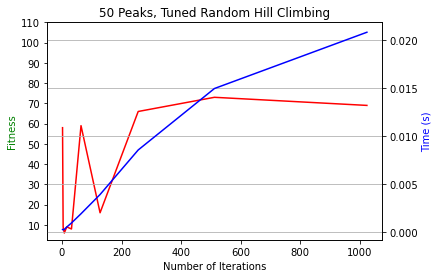

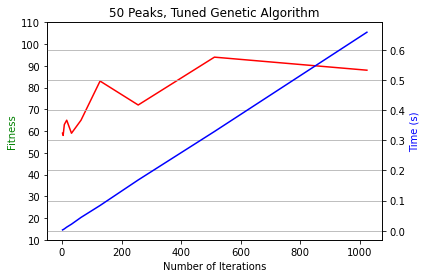

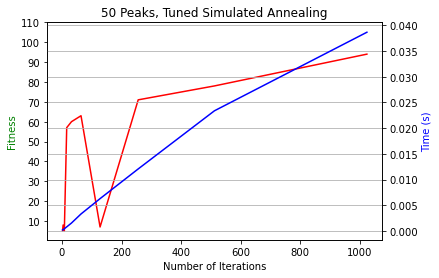

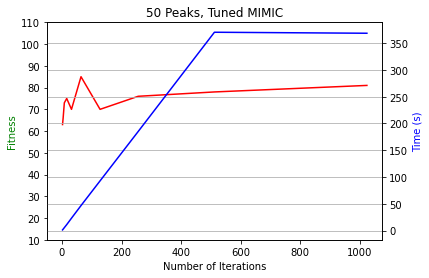

In [17]:
#======= Plots for all individual learners==========#
# Random Hill Climbing
plot_fitness_curve("%s Peaks, Tuned Random Hill Climbing" %(num_peak), iterations_range, rhc_best_fitness, rhc_convergence_time)
# Genetic Algorithms
plot_fitness_curve("%s Peaks, Tuned Genetic Algorithm" %(num_peak), iterations_range, ga_best_fitness, ga_convergence_time)
# Simulated Annealing
plot_fitness_curve("%s Peaks, Tuned Simulated Annealing" %(num_peak), iterations_range, sa_best_fitness, sa_convergence_time)
# MIMIC
plot_fitness_curve("%s Peaks, Tuned MIMIC" %(num_peak), iterations_range, mimic_best_fitness, mimic_convergence_time)

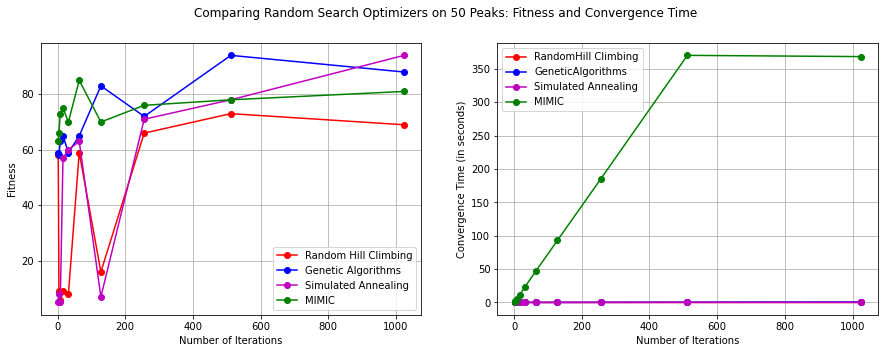

In [18]:
#======= Comparison of all four optimization algorithms ==========#
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Comparing Random Search Optimizers on %s Peaks: Fitness and Convergence Time' %(num_peak))
ax1.set(xlabel="Number of Iterations", ylabel="Fitness")
ax1.grid()
ax1.plot(iterations_range, (rhc_best_fitness), 'o-', color="r", label='Random Hill Climbing')
ax1.plot(iterations_range, (ga_best_fitness), 'o-', color="b", label='Genetic Algorithms')
ax1.plot(iterations_range, (sa_best_fitness), 'o-', color="m", label='Simulated Annealing')
ax1.plot(iterations_range, (mimic_best_fitness), 'o-', color="g", label='MIMIC')
ax1.legend(loc="best")
ax2.set(xlabel="Number of Iterations", ylabel="Convergence Time (in seconds)")
ax2.grid()
ax2.plot(iterations_range, rhc_convergence_time, 'o-', color="r", label='RandomHill Climbing')
ax2.plot(iterations_range, ga_convergence_time, 'o-', color="b", label='GeneticAlgorithms')
ax2.plot(iterations_range, sa_convergence_time, 'o-', color="m", label='Simulated Annealing')
ax2.plot(iterations_range, mimic_convergence_time, 'o-', color="g", label='MIMIC')
ax2.legend(loc="best")
plt.show()